# Proyecto Big Data
## Estudiante: Alejandro Quesada Calderón

# 1. Selección del Dataset

---

##Descripcion del Dataset

En total son **dos** datasets:
***King Country House Sales Data*** y ***Seattle Airbnb Listing Data***

El primero cuenta con observaciones de mas de 20 mil filas de casas vendidas con sus características como precio, número de habitaciones, número de baños,etc.
Por otro lado el dataset de Airbnb contiene los listados de casas en la plataforma con múltiples características como el precio promedio, la cantidad de noches mínimas, etc. Combinando ambos datasets es de donde vamos a hacer el analisis de datos.

**Variables Objetivo:**

* `price` (el precio de la venta de las casas en King County es el que se busca a predecir).

**Variables Predictoras:**
* `sqft_living`: Área habitable en pies cuadrados.

* `bedrooms`: Número de habitaciones.

* `bathrooms`: Número de baños.

* `floors`: Número de pisos.

* `waterfront`: Indicador de si la casa tiene vista al agua (1 = sí, 0 = no).

* `view`: Calificación de la vista (0 = sin vista, 4 = excelente vista).

* `condition`: Condición de la casa (1 = pobre, 5 = excelente).

* `grade`: Calificación general de la casa (1 = baja, 13 = alta).

* `yr_built`: Año de construcción.

* `yr_renovated`: Año de renovación (si aplica).

* `zipcode`: Código postal de la ubicación.

* `lat, long`: Coordenadas geográficas.

* `sqft_living15`, `sqft_lot15`: Área habitable y total de los 15 vecinos más cercanos.

* `listing_count`: Número de listados de Airbnb por código postal.

* `avg_airbnb_price`: Precio promedio de los listados de Airbnb por código postal.

* `minimum_nights`: Noches mínimas promedio requeridas en los listados de Airbnb por código postal.

* `number_of_reviews`: Número promedio de reseñas por listado de Airbnb por código postal.
---

## Referencias a los datasets utilizados:

1. Precios de Venta de Viviendas en el Condado de King, Washington: https://www.kaggle.com/datasets/harlfoxem/housesalesprediction
2. Listados de propiedades en Airbnb para la ciudad de Seattle, Washington: https://www.kaggle.com/datasets/adriangonzalezcortes/seattle-airbnb-dataset

# Predicción, pasando de regresión a clasificación

Se puede tomar como clasificación si se toma la distribución de precios de las casas, se divide en la media, y se entrena un algoritmo para que clasifique de manera predictiva los precios en 2 clases: más baratas que la media y más caras que la media

In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("harlfoxem/housesalesprediction")

print("Path to dataset files:", path)

path2 = kagglehub.dataset_download("adriangonzalezcortes/seattle-airbnb-dataset")

print("Path to dataset files:", path2)

/Users/ajqc/PycharmProjects/PythonProject/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/ajqc/PycharmProjects/PythonProject/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /Users/ajqc/.cache/kagglehub/datasets/harlfoxem/housesalesprediction/versions/1
Path to dataset files: /Users/ajqc/.cache/kagglehub/datasets/adriangonzalezcortes/seattle-airbnb-dataset/versions/1


In [3]:
df1 = pd.read_csv(path + "/kc_house_data.csv")

df1.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
airbnb_data = pd.read_csv(path2 + "/listings.csv")

airbnb_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2318,Casa Madrona - Urban Oasis 1 block from the park!,2536,Megan,Central Area,Madrona,47.61094,-122.29286,Entire home/apt,475,30,32,2020-02-01,0.58,2,238
1,6606,"Fab, private seattle urban cottage!",14942,Joyce,Other neighborhoods,Wallingford,47.65444,-122.33629,Entire home/apt,102,2,153,2021-07-12,2.45,1,87
2,9419,Glorious sun room w/ memory foambed,30559,Angielena,Other neighborhoods,Georgetown,47.55017,-122.31937,Private room,75,2,149,2021-06-28,1.12,9,275
3,9531,The Adorable Sweet Orange Craftsman,31481,Cassie,West Seattle,Fairmount Park,47.55495,-122.38663,Entire home/apt,165,5,45,2021-05-31,0.52,2,276
4,9534,The Coolest Tangerine Dream MIL!,31481,Cassie,West Seattle,Fairmount Park,47.55627,-122.38607,Entire home/apt,125,5,58,2021-04-25,0.58,2,311


In [5]:
# Spatial Join Example: House Prices + Airbnb using GeoPandas

import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

# 1. Load datasets (adjust path as needed)
house_df =df1
airbnb_df = airbnb_data

# 2. Create GeoDataFrames
house_gdf = gpd.GeoDataFrame(
    house_df,
    geometry=gpd.points_from_xy(house_df.long, house_df.lat),
    crs="EPSG:4326"  # WGS84 Latitude/Longitude
)

airbnb_gdf = gpd.GeoDataFrame(
    airbnb_df,
    geometry=gpd.points_from_xy(airbnb_df.longitude, airbnb_df.latitude),
    crs="EPSG:4326"
)

# 3. Reproject to a metric system (e.g., UTM Zone 10N for Seattle)
house_gdf = house_gdf.to_crs(epsg=32610)
airbnb_gdf = airbnb_gdf.to_crs(epsg=32610)

# 4. Perform spatial join - find nearest Airbnb for each house
joined_gdf = gpd.sjoin_nearest(house_gdf, airbnb_gdf, how="inner", distance_col="dist_m")

# 5. Optional: filter by distance threshold (e.g., 500 meters)
distance_threshold = 50  # meters
joined_filtered = joined_gdf[joined_gdf["dist_m"] <= distance_threshold]

# 6. Save or view results
joined_filtered.to_csv("joined_house_airbnb.csv", index=False)
joined_filtered.head()


,id_left,date,price_left,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,longitude,room_type,price_right,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,dist_m
14,1175000570,20150312T000000,530000.0,5,2.00,1810,4850,1.5,0,0,...,-122.39379,Entire home/apt,95,30,118,2021-01-02,2.62,1,177,16.113838
15,9297300055,20150124T000000,650000.0,4,3.00,2950,5000,2.0,0,3,...,-122.37466,Private room,60,30,1,2012-06-06,0.01,1,163,49.372153
28,5101402488,20140624T000000,438000.0,3,1.75,1520,6380,1.0,0,0,...,-122.30379,Entire home/apt,62,1,146,2021-07-08,4.69,1,1,47.167490
37,2768000400,20141230T000000,640000.0,4,2.00,2360,6000,2.0,0,0,...,-122.36163,Private room,45,30,6,2020-03-01,0.13,1,133,46.008134
85,4232902595,20141114T000000,940000.0,3,1.50,2140,3600,2.0,0,0,...,-122.36488,Entire home/apt,140,30,0,NaN,NaN,1,31,27.105637


In [6]:
joined_filtered.describe()

,id_left,price_left,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,host_id,latitude,longitude,price_right,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,dist_m
count,1.031000e+03,1.031000e+03,1031.000000,1031.000000,1031.000000,1031.000000,1031.000000,1031.000000,1031.000000,1031.000000,...,1.031000e+03,1031.000000,1031.000000,1031.000000,1031.000000,1031.000000,945.000000,1031.000000,1031.000000,1031.000000
mean,4.993145e+09,5.919611e+05,3.096993,1.974782,1727.774976,4099.276431,1.655674,0.001940,0.263822,3.409311,...,7.222273e+07,47.630167,-122.335204,171.380213,11.723569,83.616877,3.315418,5.952473,162.287100,31.450967
std,2.964531e+09,2.834692e+05,1.363996,0.789783,718.528930,2719.985264,0.647448,0.044023,0.798202,0.700396,...,9.277893e+07,0.052181,0.038198,180.366609,15.103790,106.886546,4.950850,14.532677,111.051169,12.712986
min,7.600057e+06,9.000000e+04,1.000000,0.750000,370.000000,609.000000,1.000000,0.000000,0.000000,1.000000,...,2.536000e+03,47.501363,-122.415520,19.000000,1.000000,0.000000,0.010000,1.000000,0.000000,1.341146
25%,2.419401e+09,4.250000e+05,2.000000,1.000000,1220.000000,2098.000000,1.000000,0.000000,0.000000,3.000000,...,9.184097e+06,47.588530,-122.367065,90.000000,2.000000,9.000000,0.980000,1.000000,61.000000,22.248567
50%,4.364200e+09,5.400000e+05,3.000000,2.000000,1570.000000,4000.000000,1.500000,0.000000,0.000000,3.000000,...,3.273436e+07,47.640100,-122.336510,128.000000,2.000000,42.000000,2.270000,1.000000,143.000000,33.349008
75%,7.595700e+09,6.850000e+05,4.000000,2.500000,2070.000000,5186.500000,2.000000,0.000000,0.000000,4.000000,...,9.988936e+07,47.672775,-122.301540,195.000000,30.000000,119.000000,4.070000,2.000000,272.000000,42.525127
max,9.839301e+09,3.300000e+06,33.000000,4.500000,7710.000000,34527.000000,3.500000,1.000000,4.000000,5.000000,...,4.023305e+08,47.734010,-122.241923,3750.000000,210.000000,616.000000,71.000000,104.000000,365.000000,49.983859


In [7]:
joined_filtered.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 1031 entries, 14 to 21586
Data columns (total 40 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   id_left                         1031 non-null   int64   
 1   date                            1031 non-null   object  
 2   price_left                      1031 non-null   float64 
 3   bedrooms                        1031 non-null   int64   
 4   bathrooms                       1031 non-null   float64 
 5   sqft_living                     1031 non-null   int64   
 6   sqft_lot                        1031 non-null   int64   
 7   floors                          1031 non-null   float64 
 8   waterfront                      1031 non-null   int64   
 9   view                            1031 non-null   int64   
 10  condition                       1031 non-null   int64   
 11  grade                           1031 non-null   int64   
 12  sqft_above     

In [33]:
# Install necessary packages (only run once per environment)
# !pip install pandas openpyxl requests

import pandas as pd
import requests
from io import BytesIO

# === 1. Load Global Terrorism Database (GTD) ===
# If downloaded manually:
gtd = pd.read_excel("datasets/GTD.xlsx", engine='openpyxl')

In [18]:
# === 2. Load World Governance Indicators (WGI) ===
wgi_raw = pd.read_excel("datasets/WGI.xlsx", sheet_name="Data", engine="openpyxl")

In [24]:
# === 3. Preprocess WGI ===
# Melt the year columns into rows to normalize the format
year_columns = [col for col in wgi_raw.columns if col.startswith("19") or col.startswith("20")]
wgi_melted = wgi_raw.melt(
    id_vars=["Country Name", "Country Code", "Series Name", "Series Code"],
    value_vars=year_columns,
    var_name="Year",
    value_name="Value"
)

In [72]:
wgi_melted.head()

,Country Name,Country Code,Series Name,Series Code,Year,Value
0,Afghanistan,AFG,Control of Corruption: Estimate,CC.EST,1996,-1.291705
1,Afghanistan,AFG,Government Effectiveness: Estimate,GE.EST,1996,-2.175167
2,Afghanistan,AFG,Regulatory Quality: Estimate,RQ.EST,1996,-2.090330
3,Afghanistan,AFG,Rule of Law: Estimate,RL.EST,1996,-1.788075
4,Afghanistan,AFG,Voice and Accountability: Estimate,VA.EST,1996,-1.908540


In [73]:
wgi_melted.columns

Index(['Country Name', 'Country Code', 'Series Name', 'Series Code', 'Year',
       'Value'],
      dtype='object')

In [26]:
# Clean the "Year" column from "1996 [YR1996]" to just 1996
wgi_melted["Year"] = wgi_melted["Year"].str.extract(r'(\d{4})').astype(int)
wgi_melted_no_dots = wgi_melted["Value"].apply(pd.to_numeric, errors="coerce")
wgi_melted["Value"] = wgi_melted_no_dots
wgi_melted = wgi_melted.dropna(subset=["Value"])

In [27]:
wgi_melted

,Country Name,Country Code,Series Name,Series Code,Year,Value
0,Afghanistan,AFG,Control of Corruption: Estimate,CC.EST,1996,-1.291705
1,Afghanistan,AFG,Government Effectiveness: Estimate,GE.EST,1996,-2.175167
2,Afghanistan,AFG,Regulatory Quality: Estimate,RQ.EST,1996,-2.090330
3,Afghanistan,AFG,Rule of Law: Estimate,RL.EST,1996,-1.788075
4,Afghanistan,AFG,Voice and Accountability: Estimate,VA.EST,1996,-1.908540
...,...,...,...,...,...,...
26865,Zimbabwe,ZWE,Control of Corruption: Estimate,CC.EST,2023,-1.261216
26866,Zimbabwe,ZWE,Government Effectiveness: Estimate,GE.EST,2023,-1.170335
26867,Zimbabwe,ZWE,Regulatory Quality: Estimate,RQ.EST,2023,-1.338359
26868,Zimbabwe,ZWE,Rule of Law: Estimate,RL.EST,2023,-1.277143


## Estadísticas sobre el conjunto de GTD (Global Terror)

In [36]:
gtd.head(10)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaT,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaT,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaT,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaT,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaT,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
5,197001010002,1970,1,1,NaN,0,NaT,217,United States,1,...,"The Cairo Chief of Police, William Petersen, r...","""Police Chief Quits,"" Washington Post, January...","""Cairo Police Chief Quits; Decries Local 'Mili...","Christopher Hewitt, ""Political Violence and Te...",Hewitt Project,-9,-9,0,-9,NaN
6,197001020001,1970,1,2,NaN,0,NaT,218,Uruguay,3,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
7,197001020002,1970,1,2,NaN,0,NaT,217,United States,1,...,"Damages were estimated to be between $20,000-$...",Committee on Government Operations United Stat...,"Christopher Hewitt, ""Political Violence and Te...",NaN,Hewitt Project,-9,-9,0,-9,NaN
8,197001020003,1970,1,2,NaN,0,NaT,217,United States,1,...,The New Years Gang issue a communiqué to a loc...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...","The Wisconsin Cartographers' Guild, ""Wisconsin...",Hewitt Project,0,0,0,0,NaN
9,197001030001,1970,1,3,NaN,0,NaT,217,United States,1,...,"Karl Armstrong's girlfriend, Lynn Schultz, dro...",Committee on Government Operations United Stat...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...",Hewitt Project,0,0,0,0,NaN


In [35]:
gtd.describe()

,eventid,iyear,imonth,iday,extended,resolution,country,region,latitude,longitude,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,2.097060e+05,209706.000000,209706.000000,209706.000000,209706.000000,4861,209706.000000,209706.000000,205015.000000,205014.000000,...,1.533000e+03,7.340000e+02,9.510000e+02,725.000000,14091.000000,13494.000000,209706.000000,209706.000000,209706.000000,209706.000000
mean,2.004867e+11,2004.800993,6.455285,15.527930,0.051525,2006-12-14 11:22:40.581978880,130.291351,7.279854,23.358696,30.416738,...,2.791526e+06,3.211036e+05,6.204108e+05,182.750345,4.705912,-31.945531,-4.424289,-4.339318,0.086841,-3.850758
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,1970-03-08 00:00:00,4.000000,1.000000,-53.154613,-176.176447,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-100.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.992080e+11,1992.000000,4.000000,8.000000,0.000000,1997-05-22 00:00:00,69.000000,6.000000,11.510046,8.748117,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.012010e+11,2012.000000,6.000000,15.000000,0.000000,2013-04-29 00:00:00,98.000000,8.000000,31.300213,43.746215,...,1.000000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.015123e+11,2015.000000,9.000000,23.000000,0.000000,2016-05-10 00:00:00,160.000000,10.000000,34.557022,68.835918,...,3.420000e+05,0.000000e+00,6.640600e+02,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.020123e+11,2020.000000,12.000000,31.000000,1.000000,2021-05-29 00:00:00,1004.000000,12.000000,74.633553,179.366667,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2958.000000,1.000000,1.000000,1.000000,1.000000
std,1.351933e+09,13.519321,3.387098,8.801104,0.221066,NaN,111.714562,2.905697,18.137061,56.113029,...,2.826923e+07,5.005760e+06,9.195574e+06,2567.718184,2.030311,64.494306,4.543800,4.640302,0.536943,4.677966


In [57]:
# seleccion de columnas relevantes para un analisis epxloratorio
selected_columns = ['iyear', 'country_txt', 'region_txt', 'attacktype1_txt', 'weaptype1_txt',
                    'nkill', 'nwound', 'success', 'suicide', 'targtype1_txt']
gtd_df = gtd[selected_columns]

In [ ]:
# renombrar columnas
gtd_df.rename(columns={
    'iyear': 'year',
    'country_txt': 'country',
    'region_txt': 'region',
    'attacktype1_txt': 'attack_type',
    'weaptype1_txt': 'weapon_type',
    'nkill': 'killed',
    'nwound': 'wounded',
    'targtype1_txt': 'target_type'
}, inplace=True)

In [59]:
# valores faltantes
gtd_df = gtd_df.copy()

gtd_df['killed'] = gtd_df['killed'].fillna(0)
gtd_df['wounded'] = gtd_df['wounded'].fillna(0)
gtd_df['casualties'] = gtd_df['killed'] + gtd_df['wounded']


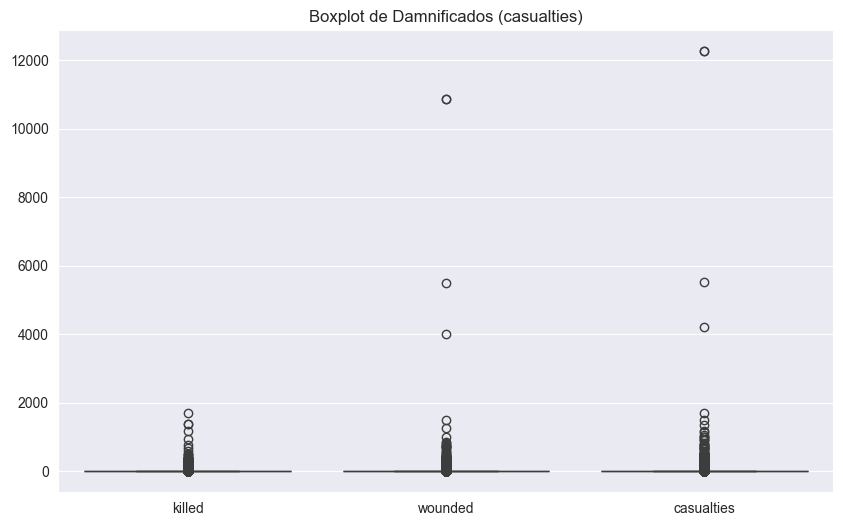

In [55]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=gtd_df[['killed', 'wounded', 'casualties']])
plt.title('Boxplot de Damnificados')
plt.show()

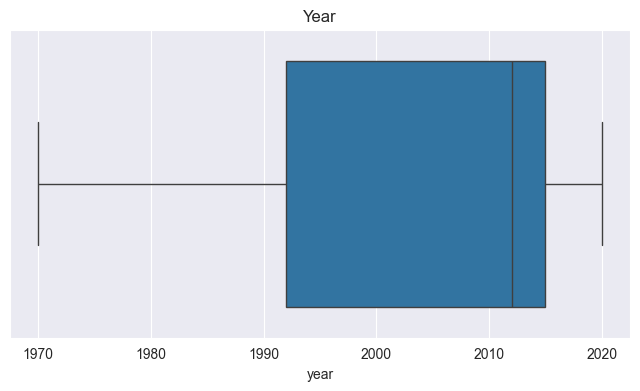

In [64]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=gtd_df, x='year')
plt.title("Year")
plt.show()

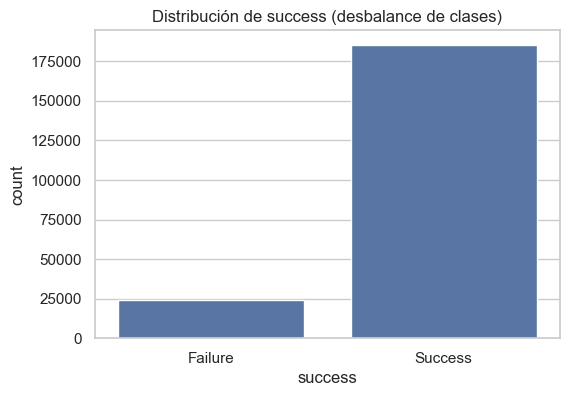

In [94]:
# revision del balanceo de clases
plt.figure(figsize=(6, 4))
sns.countplot(data=gtd_df, x='success')
plt.title('Distribución de success (desbalance de clases)')
plt.xticks([0, 1], ['Failure', 'Success'])
plt.show()

### Matriz de Correlacion

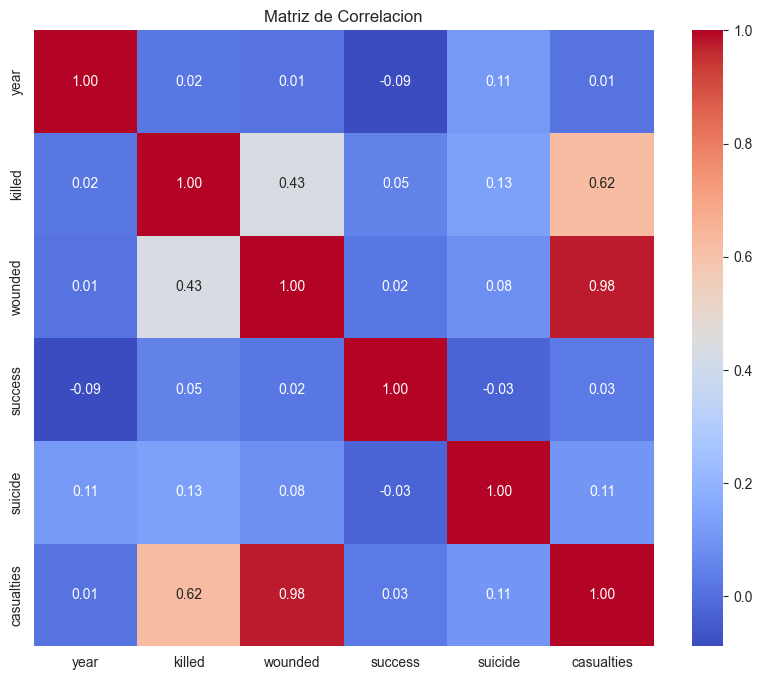

In [67]:
numeric_cols = gtd_df.select_dtypes(include=[np.number]).columns.tolist()
corr = gtd_df[numeric_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlacion')
plt.show()

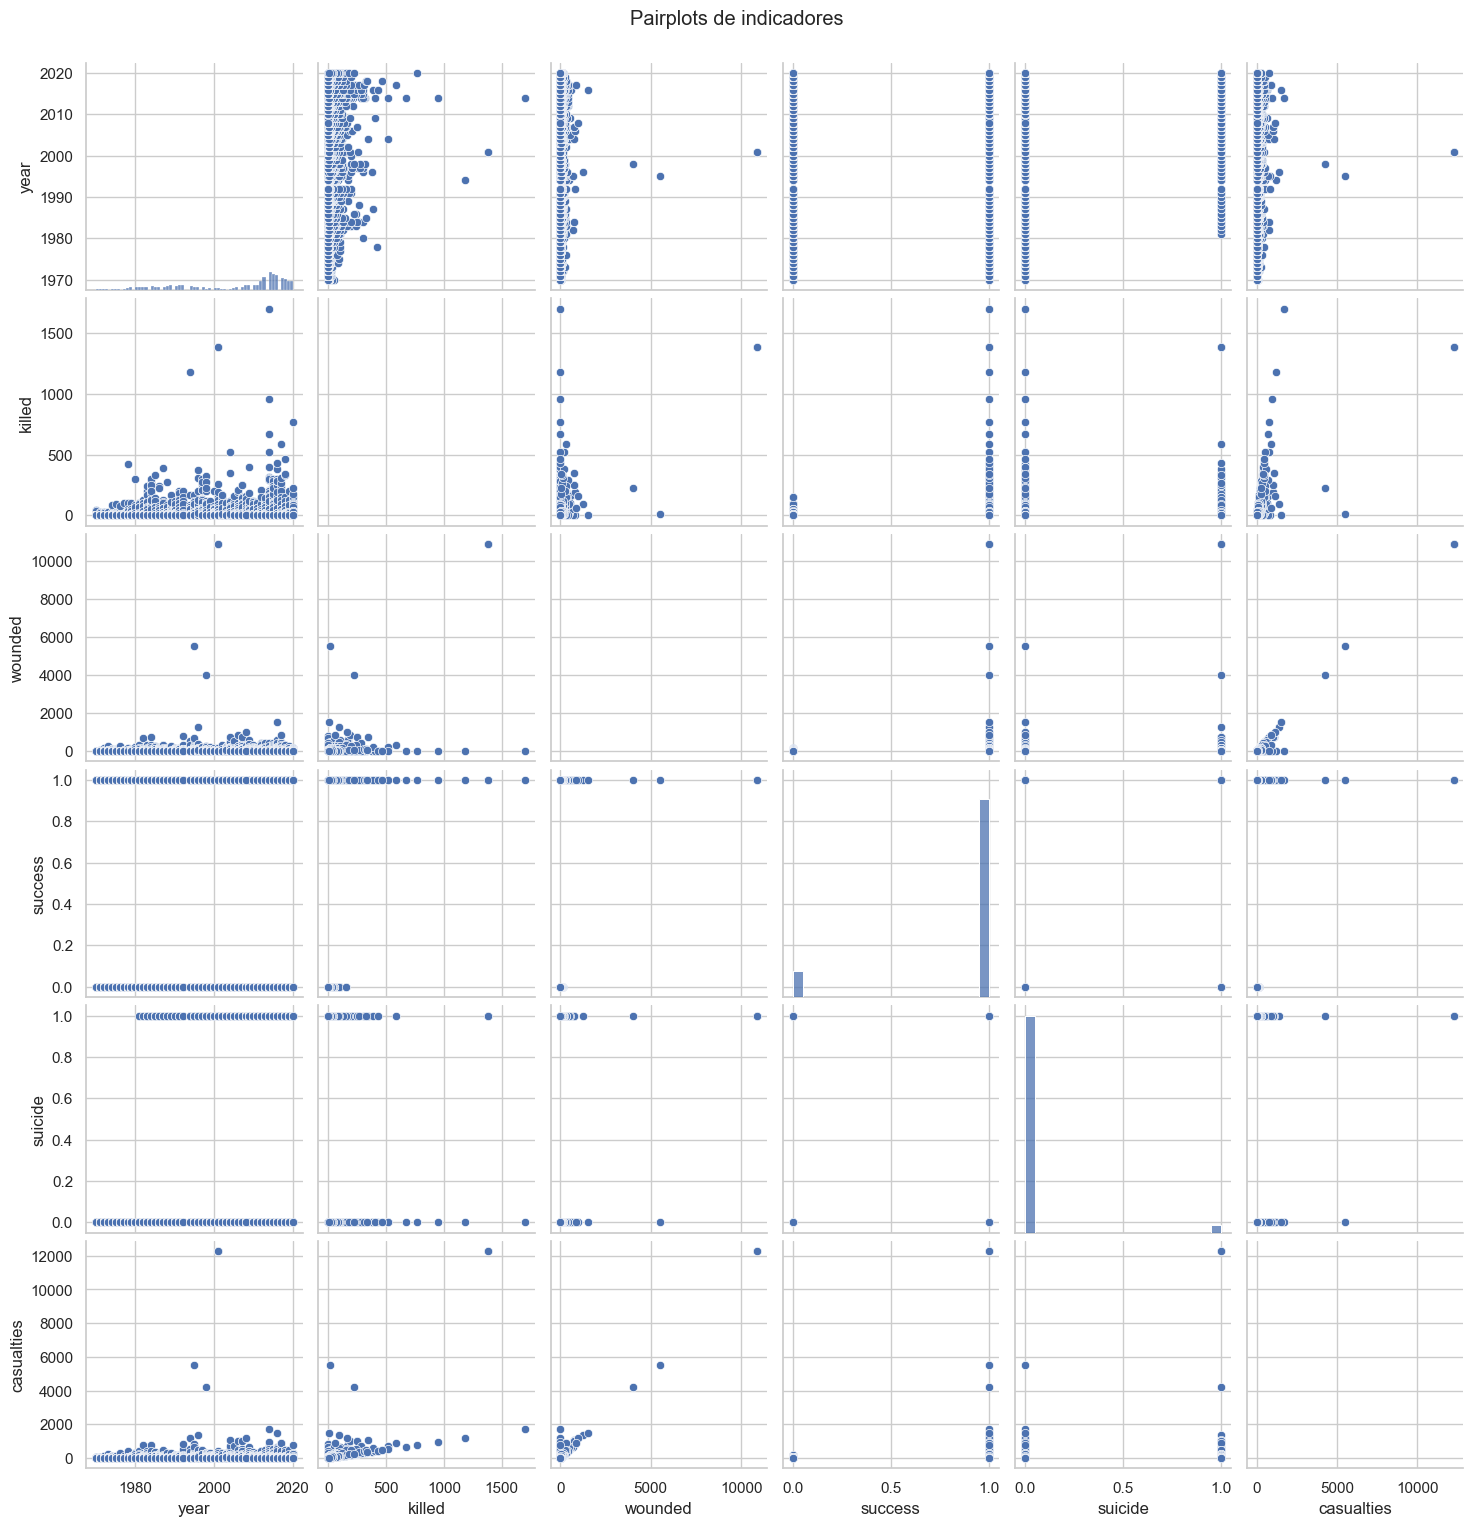

In [90]:
sns.pairplot(gtd_df[numeric_cols])
plt.suptitle("Pairplots de indicadores", y=1.02)
plt.show()

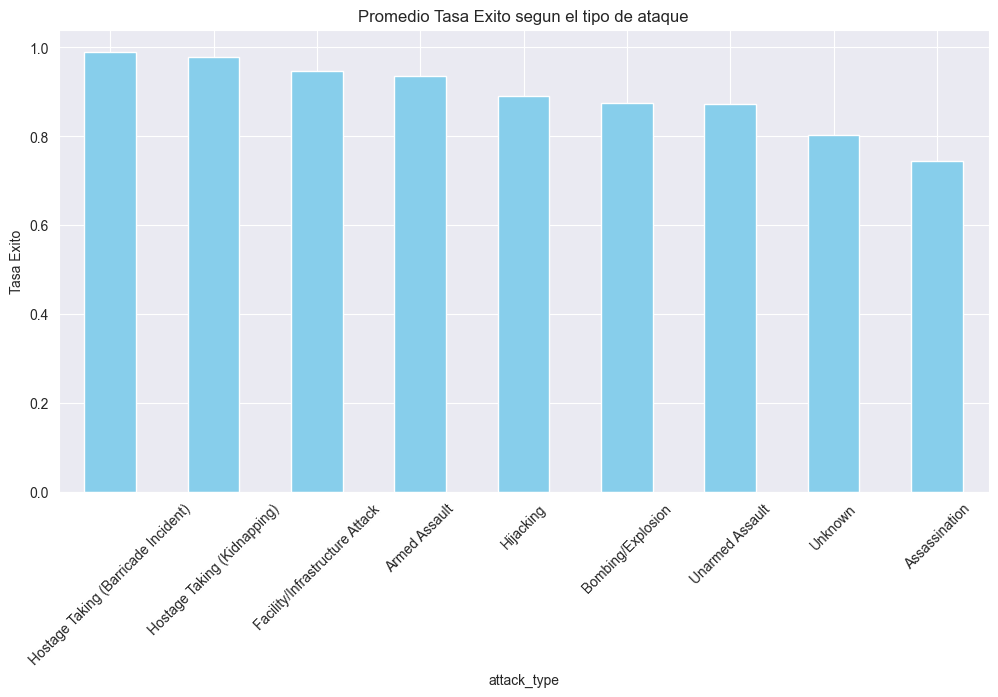

In [68]:
plt.figure(figsize=(12, 6))
success_by_attack = gtd_df.groupby('attack_type')['success'].mean().sort_values(ascending=False)
success_by_attack.plot(kind='bar', color='skyblue')
plt.ylabel('Tasa Exito')
plt.title('Promedio Tasa Exito segun el tipo de ataque')
plt.xticks(rotation=45)
plt.show()

### Comparación de ataques marcados como suicidio

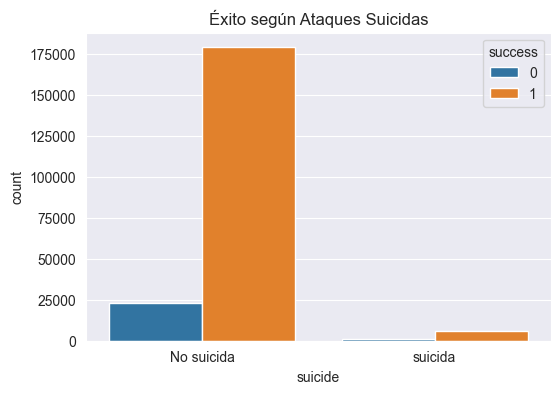

In [74]:
plt.figure(figsize=(6, 4))
sns.countplot(data=gtd_df, x='suicide', hue='success')
plt.title('Éxito según Ataques Suicidas')
plt.xticks([0, 1], ['No suicida', 'suicida'])
plt.show()

### Cuantificacion del imbalance de clases

In [54]:
class_counts = gtd_df['success'].value_counts()
print("Distribución de valores:")
print(class_counts)
print("\nPorcentaje en la clase:")
print(class_counts / class_counts.sum())

Distribución de valores:
success
1    185302
0     24404
Name: count, dtype: int64

Porcentaje en la clase:
success
1    0.883628
0    0.116372
Name: count, dtype: float64


In [75]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn theme for plots
sns.set(style="whitegrid")

In [79]:
# Load the WGI dataset from the Excel file
wgi_raw = pd.read_excel("datasets/WGI.xlsx", sheet_name="Data", engine="openpyxl")
wgi_raw.head()

,Country Name,Country Code,Series Name,Series Code,1996 [YR1996],1998 [YR1998],2000 [YR2000],2002 [YR2002],2003 [YR2003],2004 [YR2004],...,2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023]
0,Afghanistan,AFG,Control of Corruption: Estimate,CC.EST,-1.291705,-1.176012,-1.271724,-1.251137,-1.34418,-1.350647,...,-1.364934,-1.354713,-1.540228,-1.530075,-1.502876,-1.41931,-1.493361,-1.152266,-1.183684,-1.154932
1,Afghanistan,AFG,Government Effectiveness: Estimate,GE.EST,-2.175167,-2.102292,-2.173946,-1.587687,-1.175768,-0.945146,...,-1.361646,-1.397395,-1.291468,-1.386597,-1.501758,-1.519113,-1.611539,-1.670588,-1.880035,-1.987014
2,Afghanistan,AFG,Regulatory Quality: Estimate,RQ.EST,-2.09033,-2.062872,-2.080253,-1.811546,-1.463108,-1.511549,...,-1.124134,-1.018826,-1.339695,-1.36301,-1.138204,-1.113778,-1.389163,-1.311682,-1.271806,-1.266425
3,Afghanistan,AFG,Rule of Law: Estimate,RL.EST,-1.788075,-1.734887,-1.780661,-1.673473,-1.558294,-1.693925,...,-1.437702,-1.516201,-1.522534,-1.581176,-1.689124,-1.7421,-1.831407,-1.877234,-1.659846,-1.649641
4,Afghanistan,AFG,Voice and Accountability: Estimate,VA.EST,-1.90854,-2.039301,-2.031417,-1.433421,-1.177571,-1.203034,...,-1.135523,-1.117628,-1.037837,-0.990954,-1.007687,-1.006713,-1.078267,-1.568389,-1.753529,-1.852901


In [81]:
# Melt the dataset to long format (normalize the year columns)
year_columns = [col for col in wgi_raw.columns if col.startswith("19") or col.startswith("20")]
wgi_melted = wgi_raw.melt(
    id_vars=["Country Name", "Country Code", "Series Name", "Series Code"],
    value_vars=year_columns,
    var_name="Year",
    value_name="Value"
)
# Convert year to numeric
wgi_melted["Year"] = wgi_melted["Year"].str.extract(r'(\d{4})').astype(int)
wgi_melted_no_dots = wgi_melted["Value"].apply(pd.to_numeric, errors="coerce")
wgi_melted["Value"] = wgi_melted_no_dots
wgi_melted = wgi_melted.dropna(subset=["Value"])

In [82]:
print("Shape of melted dataset:", wgi_melted.shape)
print("Unique indicators:", wgi_melted["Series Name"].nunique())
print("Unique countries:", wgi_melted["Country Name"].nunique())

Shape of melted dataset: (25796, 6)
Unique indicators: 5
Unique countries: 214


In [83]:
# Pivot the dataset to wide format with one row per country-year and each indicator as a column
wgi_pivot = wgi_melted.pivot_table(
    index=["Country Name", "Country Code", "Year"],
    columns="Series Name",
    values="Value"
).reset_index()

# Flatten the column names (optional, for cleaner plots)
wgi_pivot.columns.name = None
wgi_pivot.head()

,Country Name,Country Code,Year,Control of Corruption: Estimate,Government Effectiveness: Estimate,Regulatory Quality: Estimate,Rule of Law: Estimate,Voice and Accountability: Estimate
0,Afghanistan,AFG,1996,-1.291705,-2.175167,-2.090330,-1.788075,-1.908540
1,Afghanistan,AFG,1998,-1.176012,-2.102292,-2.062872,-1.734887,-2.039301
2,Afghanistan,AFG,2000,-1.271724,-2.173946,-2.080253,-1.780661,-2.031417
3,Afghanistan,AFG,2002,-1.251137,-1.587687,-1.811546,-1.673473,-1.433421
4,Afghanistan,AFG,2003,-1.344180,-1.175768,-1.463108,-1.558294,-1.177571


In [84]:
# Summary statistics
wgi_pivot.describe()

,Year,Control of Corruption: Estimate,Government Effectiveness: Estimate,Regulatory Quality: Estimate,Rule of Law: Estimate,Voice and Accountability: Estimate
count,5246.000000,5.143000e+03,5.119000e+03,5.121000e+03,5.233000e+03,5.180000e+03
mean,2010.886961,-1.823758e-10,7.616230e-11,5.040217e-10,-1.305298e-09,-5.478515e-10
std,7.571256,9.976635e-01,9.976526e-01,9.976535e-01,9.977038e-01,9.976803e-01
min,1996.000000,-1.969555e+00,-2.440229e+00,-2.547726e+00,-2.590877e+00,-2.313395e+00
25%,2005.000000,-7.765253e-01,-7.526182e-01,-7.222335e-01,-7.833216e-01,-8.226569e-01
50%,2011.000000,-2.180601e-01,-1.284974e-01,-1.089325e-01,-1.279149e-01,5.307384e-02
75%,2017.000000,7.344956e-01,7.561491e-01,8.111988e-01,8.263304e-01,9.057916e-01
max,2023.000000,2.459118e+00,2.469660e+00,2.308591e+00,2.124762e+00,1.800992e+00


In [85]:
# Check for missing values
missing_values = wgi_pivot.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 Country Name                            0
Country Code                            0
Year                                    0
Control of Corruption: Estimate       103
Government Effectiveness: Estimate    127
Regulatory Quality: Estimate          125
Rule of Law: Estimate                  13
Voice and Accountability: Estimate     66
dtype: int64


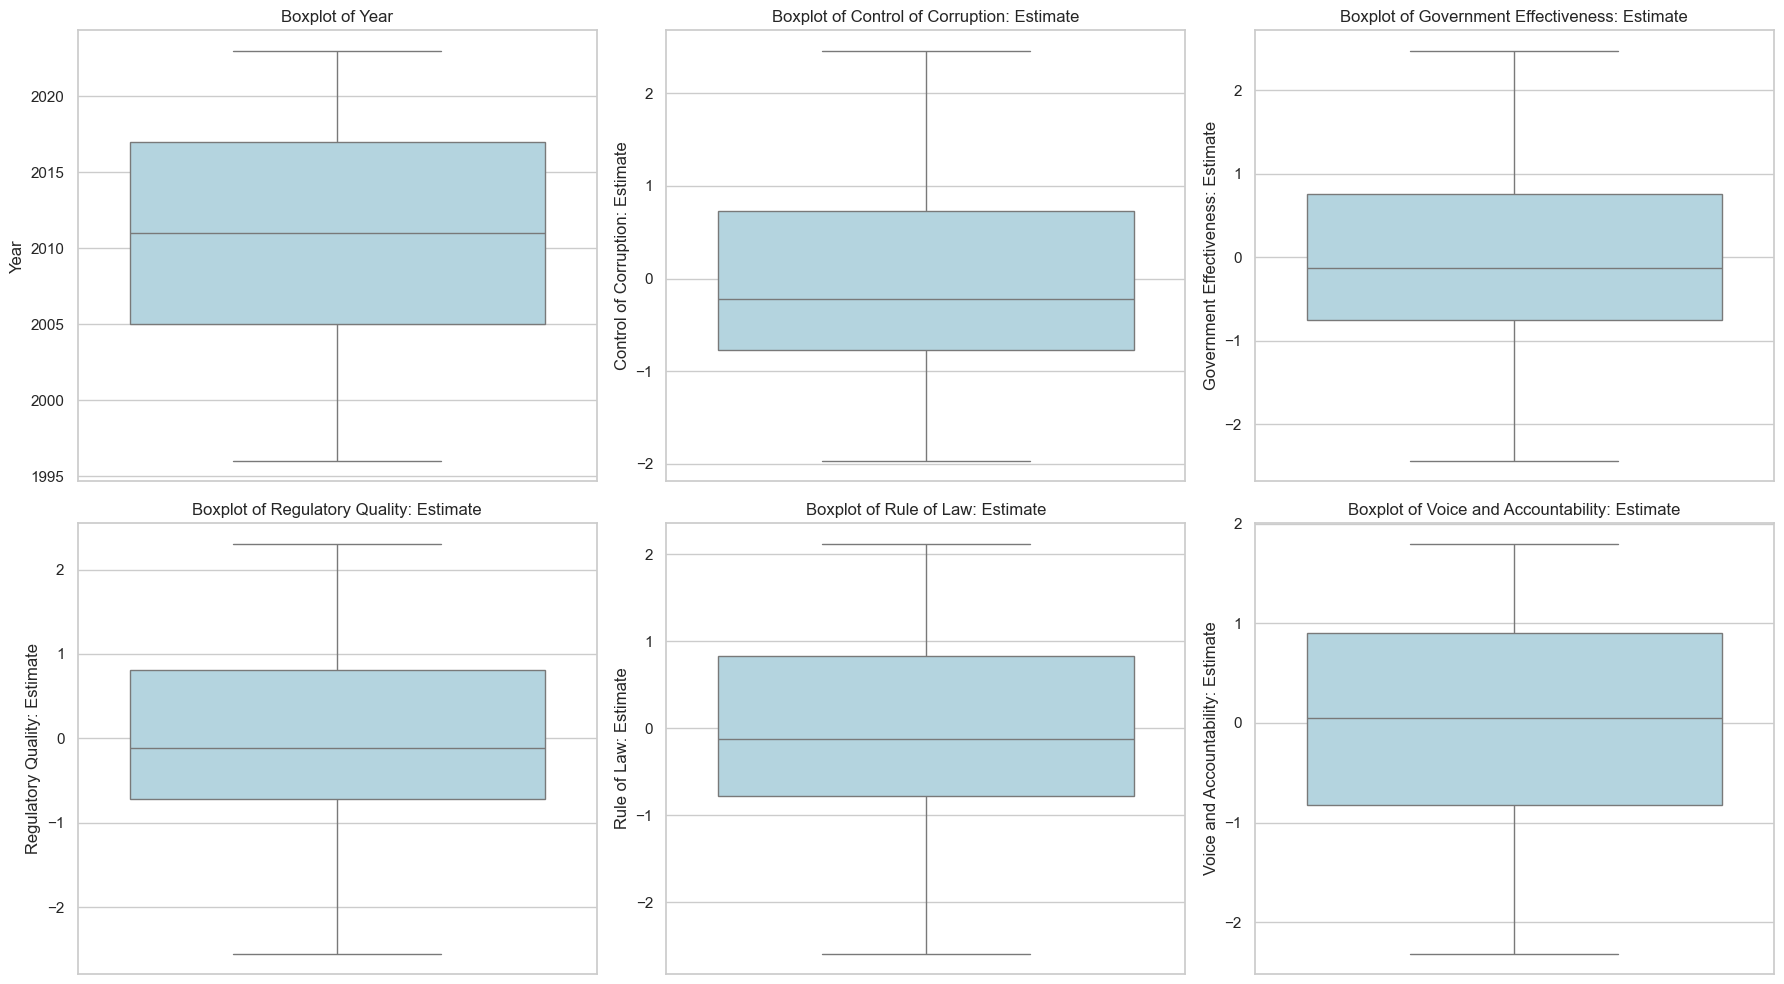

In [86]:
# Boxplots for each numeric variable (i.e., each governance indicator)
numeric_columns = wgi_pivot.select_dtypes(include=["float64", "int64"]).columns

plt.figure(figsize=(18, 10))
for i, col in enumerate(numeric_columns):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(data=wgi_pivot, y=col, color="lightblue")
    plt.title(f"Boxplot of {col}")
    plt.tight_layout()
plt.show()

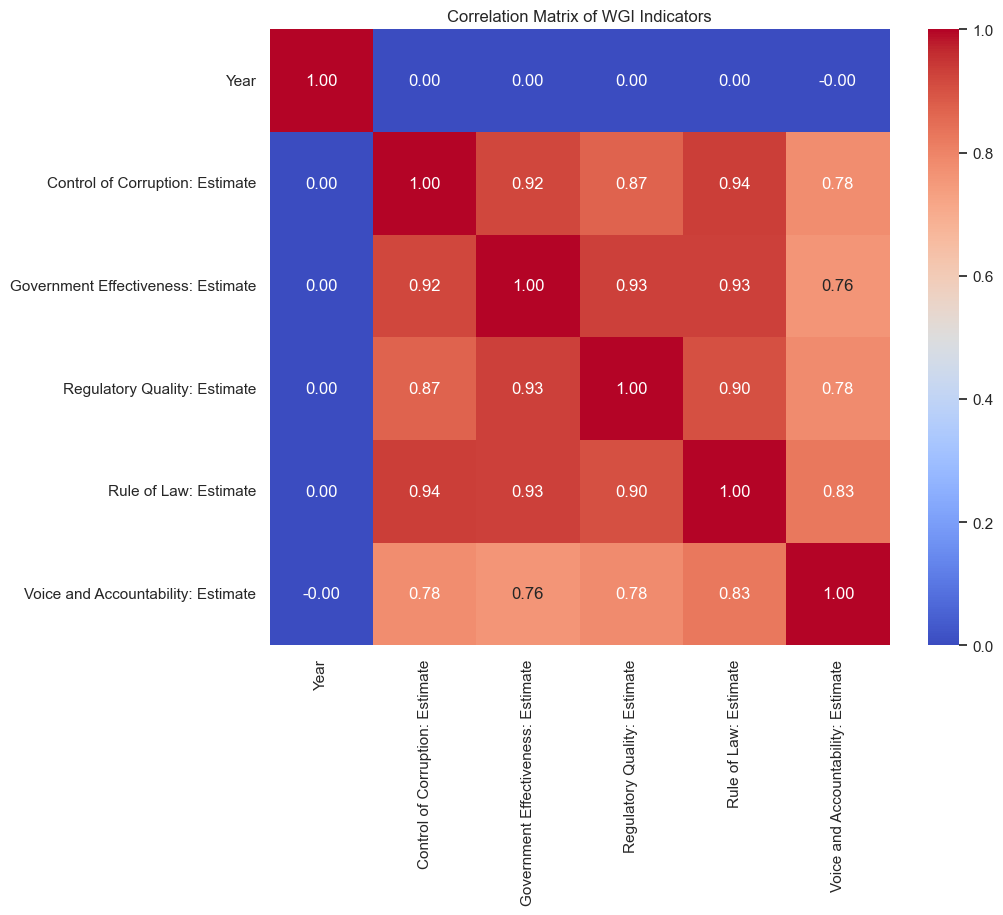

In [87]:
# Correlation matrix of all numeric indicators
corr_matrix = wgi_pivot[numeric_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of WGI Indicators")
plt.show()

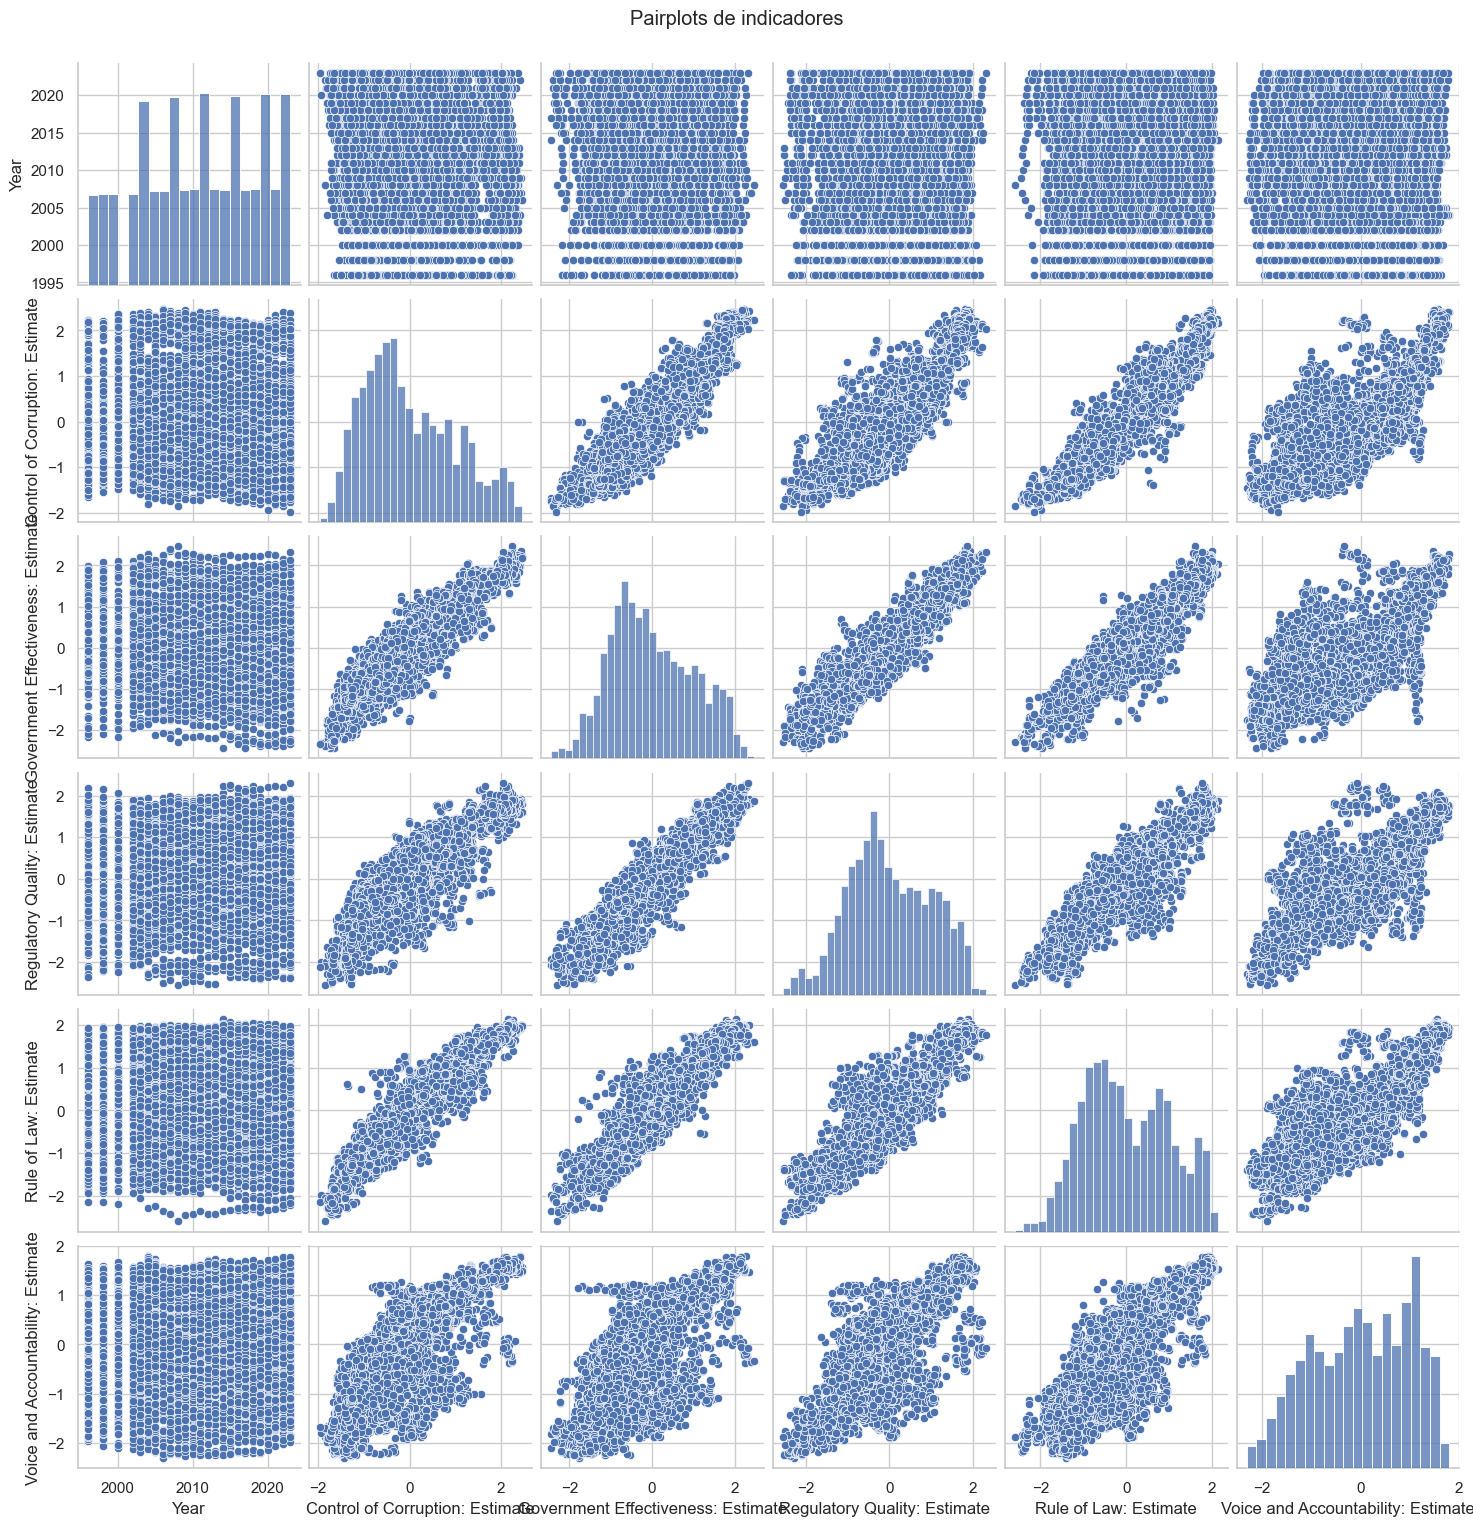

In [89]:
# Pairplot for a subset of indicators (for visual inspection of correlations)
sns.pairplot(wgi_pivot[numeric_columns])
plt.suptitle("Pairplots de indicadores", y=1.02)
plt.show()

In [91]:
# Pivot to get one row per country-year with governance indicators as columns
wgi_pivot = wgi_melted.pivot_table(
    index=["Country Name", "Country Code", "Year"],
    columns="Series Name",
    values="Value"
).reset_index()

# Rename to match GTD keys
wgi_pivot.rename(columns={
    "Country Name": "country_txt",
    "Year": "iyear"
}, inplace=True)

In [92]:
# Ensure both columns used in join are of the same dtype
gtd['iyear'] = gtd['iyear'].astype(int)
wgi_pivot['iyear'] = pd.to_numeric(wgi_pivot['iyear'], errors='coerce')

# Drop rows in WGI where 'iyear' could not be parsed to number
wgi_pivot = wgi_pivot.dropna(subset=['iyear'])
wgi_pivot['iyear'] = wgi_pivot['iyear'].astype(int)

merged = pd.merge(gtd, wgi_pivot, on=["country_txt", "iyear"], how="inner")


In [93]:
print(f"Merged dataset shape: {merged.shape}")
display(merged.head())
merged.to_csv("merged_gtd_wgi.csv", index=False)
print("Saved merged data to 'merged_gtd_wgi.csv'")

Merged dataset shape: (123242, 141)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,INT_IDEO,INT_MISC,INT_ANY,related,Country Code,Control of Corruption: Estimate,Government Effectiveness: Estimate,Regulatory Quality: Estimate,Rule of Law: Estimate,Voice and Accountability: Estimate
0,199601000001,1996,1,0,NaN,0,NaT,69,France,8,...,0,0,0,"199601000001, 199601000002",FRA,1.247409,1.251857,1.048776,1.483683,1.311158
1,199601000002,1996,1,0,NaN,0,NaT,69,France,8,...,0,0,0,"199601000001, 199601000002",FRA,1.247409,1.251857,1.048776,1.483683,1.311158
2,199601010001,1996,1,1,NaN,0,NaT,153,Pakistan,6,...,-9,0,-9,NaN,PAK,-1.220030,-0.624155,-0.510079,-0.625290,-0.596836
3,199601010002,1996,1,1,NaN,0,NaT,153,Pakistan,6,...,-9,0,-9,NaN,PAK,-1.220030,-0.624155,-0.510079,-0.625290,-0.596836
4,199601010003,1996,1,1,NaN,0,NaT,153,Pakistan,6,...,-9,0,-9,NaN,PAK,-1.220030,-0.624155,-0.510079,-0.625290,-0.596836


Saved merged data to 'merged_gtd_wgi.csv'
